*Copyright 2024 Jaeyoung Chun*

You may not make copies of this and use or distribute it for any purpose.

# StatsBomb 360 Data

In [1]:
from statsbombpy import sb
import warnings
#ignore by message
warnings.filterwarnings("ignore", message="credentials were not supplied")

import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
from tqdm import tqdm

## FIFA Worldcup 2022 Korea vs. Portugal

In [2]:
match_id = 3857262

## Get Events

In [3]:
df_events = sb.events(match_id=match_id)

In [4]:
df_events

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",South Korea,791,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Portugal,780,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Portugal,780,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,South Korea,791,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,South Korea,791,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tactical,Ui-Jo Hwang,NaN,South Korea,791,00:36:13.753,Substitution,NaN
3375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tactical,William Silva de Carvalho,NaN,Portugal,780,00:36:13.762,Substitution,NaN
3376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tactical,Bernardo Mota Veiga de Carvalho e Silva,NaN,Portugal,780,00:36:13.790,Substitution,NaN
3377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tactical,Yu-Min Cho,NaN,South Korea,791,00:47:46.061,Substitution,NaN


## Dispossessed Between 00:42:00 and 00:43:00

<img src="./img/dispossed.png" width="640" />

In [5]:
# convert to `timedelta` in order to make easy for time search
df_events.timestamp = pd.to_timedelta(df_events.timestamp)

In [6]:
mask_type = (df_events.type == "Dispossessed")
mask_timestamp =  (df_events.timestamp >= "00:42:00") & (df_events.timestamp <= "00:43:00")
mask = mask_type & mask_timestamp

In [7]:
df_found = df_events[mask]
df_found

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
3340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,South Korea,791,0 days 00:42:56.435000,Dispossessed,True


In [8]:
# squeeze since only one row found
df_found = df_found.squeeze()

In [9]:
event_id = df_found.id
event_id

'f397b77a-650c-48a7-b912-fb306479926f'

## Get 360 Data

In [10]:
match_frames = sb.frames(match_id=match_id, fmt="dataframe")

In [11]:
match_frames

,id,visible_area,match_id,teammate,actor,keeper,location
0,3d19925a-8141-4ad2-ad53-91cea24a09bb,"[77.1038248866187, 80.0, 42.2577571015581, 80....",3857262,True,False,False,"[29.800172166841833, 51.2646849651536]"
1,3d19925a-8141-4ad2-ad53-91cea24a09bb,"[77.1038248866187, 80.0, 42.2577571015581, 80....",3857262,True,False,False,"[32.077554280201184, 27.90562407080215]"
2,3d19925a-8141-4ad2-ad53-91cea24a09bb,"[77.1038248866187, 80.0, 42.2577571015581, 80....",3857262,True,False,False,"[42.38197522539887, 37.61593836740614]"
3,3d19925a-8141-4ad2-ad53-91cea24a09bb,"[77.1038248866187, 80.0, 42.2577571015581, 80....",3857262,True,False,False,"[48.21243250058349, 50.39477451106009]"
4,3d19925a-8141-4ad2-ad53-91cea24a09bb,"[77.1038248866187, 80.0, 42.2577571015581, 80....",3857262,True,False,False,"[51.05842663078367, 73.37220099711232]"
...,...,...,...,...,...,...,...
39190,9f5998fe-2de8-4989-88f8-ea611fe867dd,"[38.0759647755615, 80.0, 51.5843345210971, 11....",3857262,True,False,False,"[72.6360654459158, 63.26897343500727]"
39191,9f5998fe-2de8-4989-88f8-ea611fe867dd,"[38.0759647755615, 80.0, 51.5843345210971, 11....",3857262,False,False,False,"[75.66171479304305, 66.58199513640294]"
39192,9f5998fe-2de8-4989-88f8-ea611fe867dd,"[38.0759647755615, 80.0, 51.5843345210971, 11....",3857262,False,False,False,"[76.58026527075147, 55.79761922052084]"
39193,9f5998fe-2de8-4989-88f8-ea611fe867dd,"[38.0759647755615, 80.0, 51.5843345210971, 11....",3857262,False,False,False,"[78.7189331793153, 64.95283875718408]"


In [12]:
df_360 = match_frames[ match_frames.id == event_id ]

In [13]:
df_360

,id,visible_area,match_id,teammate,actor,keeper,location
35908,f397b77a-650c-48a7-b912-fb306479926f,"[32.2929389314442, 77.2260784331369, 0.0, 36.1...",3857262,False,False,True,"[3.2259534773180647, 39.4668281361418]"
35909,f397b77a-650c-48a7-b912-fb306479926f,"[32.2929389314442, 77.2260784331369, 0.0, 36.1...",3857262,False,False,False,"[17.34294920093369, 46.67039961149689]"
35910,f397b77a-650c-48a7-b912-fb306479926f,"[32.2929389314442, 77.2260784331369, 0.0, 36.1...",3857262,False,False,False,"[17.552526007039354, 34.60723689103969]"
35911,f397b77a-650c-48a7-b912-fb306479926f,"[32.2929389314442, 77.2260784331369, 0.0, 36.1...",3857262,True,False,False,"[18.88131526114575, 28.922248635346435]"
35912,f397b77a-650c-48a7-b912-fb306479926f,"[32.2929389314442, 77.2260784331369, 0.0, 36.1...",3857262,True,False,False,"[18.929027674465395, 43.66199526837472]"
35913,f397b77a-650c-48a7-b912-fb306479926f,"[32.2929389314442, 77.2260784331369, 0.0, 36.1...",3857262,False,False,False,"[20.10778008278111, 27.98408113286225]"
35914,f397b77a-650c-48a7-b912-fb306479926f,"[32.2929389314442, 77.2260784331369, 0.0, 36.1...",3857262,False,False,False,"[20.691618210543325, 40.43299869920985]"
35915,f397b77a-650c-48a7-b912-fb306479926f,"[32.2929389314442, 77.2260784331369, 0.0, 36.1...",3857262,False,False,False,"[26.799999237060547, 39.5]"
35916,f397b77a-650c-48a7-b912-fb306479926f,"[32.2929389314442, 77.2260784331369, 0.0, 36.1...",3857262,True,True,False,"[27.230814977857722, 40.37150836897598]"
35917,f397b77a-650c-48a7-b912-fb306479926f,"[32.2929389314442, 77.2260784331369, 0.0, 36.1...",3857262,False,False,False,"[27.578033954681075, 40.30690502689196]"


## Visualization

In [14]:
# display timedelta in hh:mm:ss format
def format_timedelta(td):
    total_seconds = int(td.total_seconds())
    
    hours, remainder = divmod(total_seconds, 3600)
    minutes, seconds = divmod(remainder, 60)
    
    return f"{hours:02}:{minutes:02}:{seconds:02}"

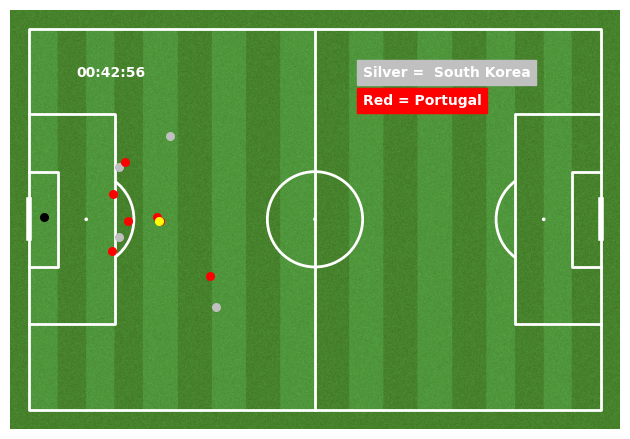

In [15]:
pitch = Pitch(
    pitch_type="statsbomb",
    pitch_color="grass",
    line_color="white",
    stripe=True
)

fig, ax = pitch.draw()

for row in df_360.itertuples():

    player_x, player_y = row.location

    if row.actor:
        pitch.scatter(
            player_x, player_y,
            c="yellow", s=30, zorder=999,
            ax=ax
        )        
    if row.keeper:
        pitch.scatter(
            player_x, player_y,
            c="black", s=30,
            ax=ax
        )
    else:
        pitch.scatter(
            player_x, player_y,
            c="silver" if row.teammate else "red", s=30,
            ax=ax
        )

ax.annotate(
    format_timedelta(df_found.timestamp),
    (10, 10),
    color="white", fontweight="bold"
)
ax.annotate(
    "Silver =  South Korea", (70, 10),
    color="white", backgroundcolor="silver", fontweight="bold"
)
ax.annotate(
    "Red = Portugal", (70, 16),
    color="white", backgroundcolor="red", fontweight="bold"
)

plt.show()